1. [Downloading Image file](#1)
1. [Building the Neural Network](#2)
1. [evaluating data](#3)
    * [Accuracy on Test data](#4)
    * [Confusin Matrix](#5)

<a id = "1"></a><br>
# Downloading Image file

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(x_train, y_train), (x_test, y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(x_train)

numpy.ndarray

In [4]:
# shape of the numpy arrays
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
# printing the 15th image

print(x_train[15])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 115 121 162
  253 253 213   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  63 107 170 25

In [6]:
print(x_train[15].shape)

(28, 28)


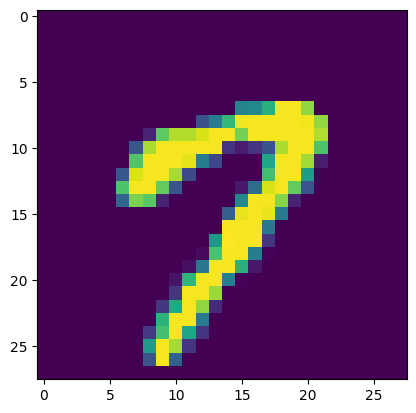

In [7]:
# displaying the image

plt.imshow(x_train[15])
plt.show()

In [8]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [9]:
# unique values in Y_train
print(np.unique(y_train))

# unique values in Y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [10]:
# scaling the values

x_train = x_train/255
x_test = x_test/255

In [11]:
# printing the 20th image

print(x_train[20])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

<a id = "2"></a><br>
# Building the Neural Network

In [12]:
# setting up the layers of the Neural  Network
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [13]:
# compiling the Neural Network
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# training the Neural Network
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3055 - accuracy: 0.9113
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1405 - accuracy: 0.9579
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1064 - accuracy: 0.9676
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0854 - accuracy: 0.9739
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0712 - accuracy: 0.9780
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0611 - accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0547 - accuracy: 0.9823
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0474 - accuracy: 0.9852
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0431 - accuracy: 0.9858
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.035

<a id = "3"></a><br>
# Evaluating data

<a id = "4"></a><br>
## Accuracy on Test data

In [15]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.1060 - accuracy: 0.9709
0.9708999991416931


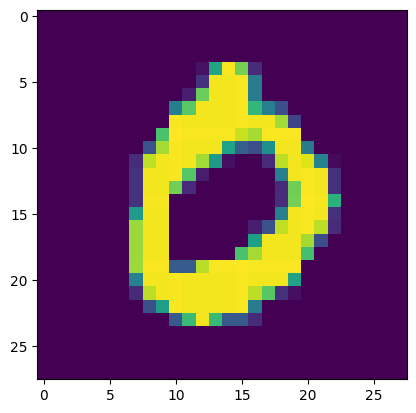

In [16]:
# first data point in X_test
plt.imshow(x_test[3])
plt.show()

In [17]:
print(y_test[3])

0


In [18]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [19]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(y_pred[3])
print(label_for_first_test_image)

0


In [20]:
# converting the prediction probabilities to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 5, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

<a id = "5"></a><br>
# Confusin Matrix

In [21]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [22]:
print(conf_mat)

tf.Tensor(
[[ 963    0    1    2    0    3    5    3    3    0]
 [   0 1118    4    1    0    2    5    1    4    0]
 [   5    0 1005    8    3    1    1    5    4    0]
 [   2    0    3  993    0    5    0    1    2    4]
 [   0    1    4    0  950    3    6    1    2   15]
 [   4    0    0   15    1  865    3    1    2    1]
 [   2    2    3    1    5    6  939    0    0    0]
 [   1    3   10    6    0    1    0  996    3    8]
 [   3    1    5   19    6   13    3    3  917    4]
 [   4    4    0   10    9    5    1    9    4  963]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

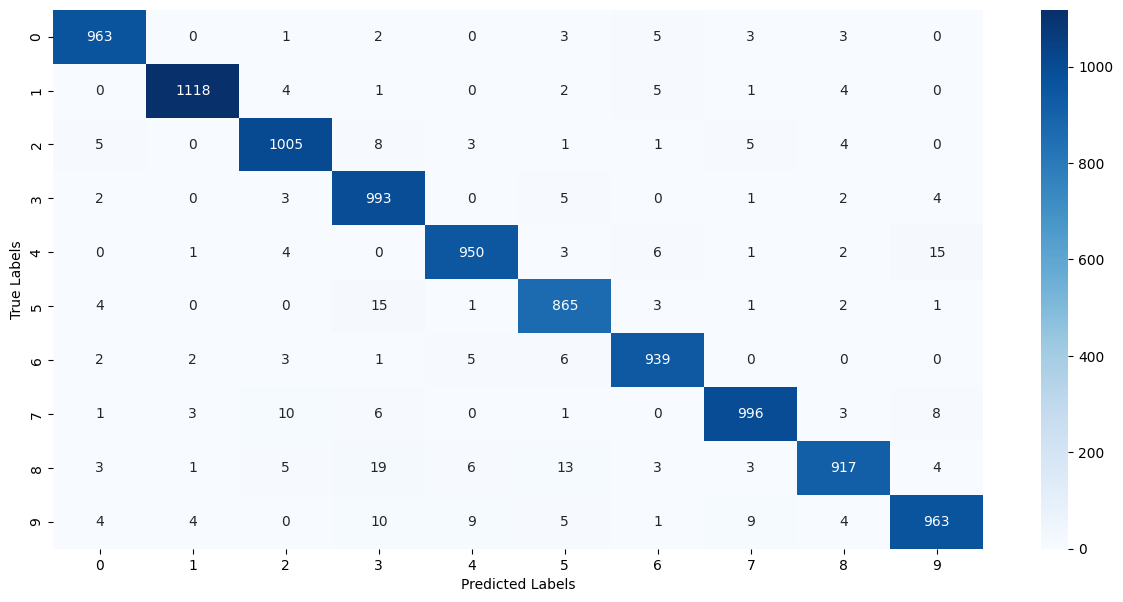

In [23]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')